<a href="https://colab.research.google.com/github/MOOwuttichai/BSC_DPDM2023/blob/main/%E0%B9%80%E0%B8%9E%E0%B8%B4%E0%B9%88%E0%B8%A1%E0%B9%80%E0%B8%95%E0%B8%B4%E0%B8%A1%20Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Data Preparation and Data Mining

## Members


In [109]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
1, 643020513-9, นายภัทรธร ก้อนมณี
2, 643020515-5, นายรัชชานนท์ ทิพย์พิมานพร
3, 643020521-0, นายวุฒิชัย คำนา
4, 643021260-7, นางสาวกิติลักษณ์ ลาดโฮม
5, 643021261-5, นางสาวจารุพร การร้อย
6, 643021263-1, นางสาวชนม์ชนก อังคุระษี
7, 643021266-5, นางสาวธิติพร ใจเอื้อ
'''), header=None).rename(columns={0:'ลำดับ', 1:'รหัสนักศึกษา', 2:'ชื่อ-สกุล'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ลำดับ,รหัสนักศึกษา,ชื่อ-สกุล
0,1,643020513-9,นายภัทรธร ก้อนมณี
1,2,643020515-5,นายรัชชานนท์ ทิพย์พิมานพร
2,3,643020521-0,นายวุฒิชัย คำนา
3,4,643021260-7,นางสาวกิติลักษณ์ ลาดโฮม
4,5,643021261-5,นางสาวจารุพร การร้อย
5,6,643021263-1,นางสาวชนม์ชนก อังคุระษี
6,7,643021266-5,นางสาวธิติพร ใจเอื้อ


## Import Library

In [110]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

!pip install apyori
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.model_selection import KFold
from pprint import pprint
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Data Preprocessing

### Import Data

In [111]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
data_65=pd.read_excel("/content/drive/MyDrive/BSC-dpdm23_flie/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2565-t-kh-64-k-y-65.xlsx")
data_64=pd.read_excel("/content/drive/MyDrive/BSC-dpdm23_flie/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2564-t-kh-63-k-y-64.xlsx")
data_63=pd.read_excel("/content/drive/MyDrive/BSC-dpdm23_flie/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2563-t-kh-62-k-y-63.xlsx")
data_62=pd.read_excel("/content/drive/MyDrive/BSC-dpdm23_flie/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2562-t-kh-61-k-y-62.xlsx")
data_61=pd.read_excel("/content/drive/MyDrive/BSC-dpdm23_flie/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2561-t-kh-60-k-y-61.xlsx")
data_60=pd.read_excel("/content/drive/MyDrive/BSC-dpdm23_flie/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2560-t-kh-59-k-y-60.xlsx")
data_59=pd.read_excel("/content/drive/MyDrive/BSC-dpdm23_flie/project/kh-muul-ubatiehtubnthaangphiess-piingbpramaan-2559-t-kh-58-k-y-59.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Check Missing Values

In [113]:
for year in range(59, 66):
    data_year = globals().get(f'data_{year}')
    if data_year is not None:
        print(f'ปี 25{year} \n{data_year.isnull().any()}')

ปี 2559 
accident_date    False
accident_time    False
expw_step        False
weather_state    False
injur_man        False
injur_femel      False
dead_man         False
dead_femel       False
cause            False
dtype: bool
ปี 2560 
accident_date    False
accident_time    False
expw_step        False
weather_state    False
injur_man        False
injur_femel      False
dead_man         False
dead_femel       False
cause            False
dtype: bool
ปี 2561 
accident_date    False
accident_time    False
expw_step        False
weather_state    False
injur_man        False
injur_femel      False
dead_man         False
dead_femel       False
cause            False
dtype: bool
ปี 2562 
accident_date    False
accident_time    False
expw_step        False
weather_state    False
injur_man        False
injur_femel      False
dead_man         False
dead_femel       False
cause            False
dtype: bool
ปี 2563 
accident_date    False
accident_time    False
expw_step        False
weather_st

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Concat Dataframe each year
`(All years: 2559-2565)`

#### First Concat

In [114]:
pd.concat([data_59,data_60,data_61,data_62,data_63,data_64,data_65]).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,accident_date,accident_time,expw_step,weather_state,injur_man,injur_femel,dead_man,dead_femel,cause,step,ad_state,acman_rec,acfem_rec,deadman_rec,deadfem_rec,cause_type
0,2016-03-15,07:23:23,ศรีรัช,ปกติ,0.0,0.0,0.0,0.0,โรคประจำตัว,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-27,12:22:22,ศรีรัช,ปกติ,0.0,0.0,0.0,0.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-12-09,14:40:40,ศรีรัช,ปกติ,0.0,0.0,0.0,0.0,ทำโทรศัพย์หล่นแล้วก้มหยิบ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-08-20,17:01:01,ศรีรัช,ปกติ,0.0,0.0,0.0,0.0,ก้มหยิบเงิน,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-04-23,09:18:18,ศรีรัช,ปกติ,0.0,0.0,0.0,0.0,บรรทุกหนัก,NaN,NaN,NaN,NaN,NaN,NaN,NaN


พบว่า ชื่อ column ในตารางของปีพ.ศ. 2564 ไม่ตรงกับตารางของปีอื่น ๆ

In [115]:
for year in range(59, 66):
    data_year = globals().get(f'data_{year}')
    if data_year is not None:
        print(f'column ปี {year} \n{data_year.columns}')

column ปี 59 
Index(['accident_date', 'accident_time', 'expw_step', 'weather_state',
       'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause'],
      dtype='object')
column ปี 60 
Index(['accident_date', 'accident_time', 'expw_step', 'weather_state',
       'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause'],
      dtype='object')
column ปี 61 
Index(['accident_date', 'accident_time', 'expw_step', 'weather_state',
       'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause'],
      dtype='object')
column ปี 62 
Index(['accident_date', 'accident_time', 'expw_step', 'weather_state',
       'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause'],
      dtype='object')
column ปี 63 
Index(['accident_date', 'accident_time', 'expw_step', 'weather_state',
       'injur_man', 'injur_femel', 'dead_man', 'dead_femel', 'cause'],
      dtype='object')
column ปี 64 
Index(['accident_date', 'accident_time', 'step', 'ad_state', 'acman_rec',
       'acfem_rec', 'd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Cleaning Data


#### เปลี่ยนชื่อ column ในตารางของแต่ละปีให้เหมือนกัน

In [116]:
data_64=data_64.rename(columns = {'step':'expw_step','ad_state':'weather_state','acman_rec':'injur_man','acfem_rec':'injur_femel'
,'deadman_rec':'dead_man','deadfem_rec':'dead_femel','cause_type':'cause'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
use_data=pd.concat([data_59,data_60,data_61,data_62,data_63,data_64,data_65]).reset_index().drop("index",axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [118]:
use_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6557 entries, 0 to 6556
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   accident_date  6557 non-null   datetime64[ns]
 1   accident_time  6557 non-null   object        
 2   expw_step      6557 non-null   object        
 3   weather_state  6557 non-null   object        
 4   injur_man      6557 non-null   int64         
 5   injur_femel    6557 non-null   int64         
 6   dead_man       6557 non-null   int64         
 7   dead_femel     6557 non-null   int64         
 8   cause          6557 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 461.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
len(use_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6557

In [120]:
# use_data.to_excel('use_data.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
type(use_data['accident_time'][0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


datetime.time

#### จัดกลุ่มแต่ละเวลาให้แบ่งเป็นช่วงเวลา

In [122]:
import datetime
def time_in_range(start, end, x):
    """Return true if x is in the range [start, end]"""
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
#ยกตัวอย่าง
start = datetime.time(6, 1, 0)
end = datetime.time(12, 0, 0)
time_in_range(start, end, use_data['accident_time'][0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True

In [124]:
use_data['accident_time'][227]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


datetime.time(12, 59, 59)

In [125]:
time_lable=[]
how =[]
#เช้า
start_0 = datetime.time(6, 0, 0)
end_0 = datetime.time(11, 59, 59)
#บ่าย
start_1 = datetime.time(12, 0, 0)
end_1 = datetime.time(17, 59, 59)
#ดึก
start_2 = datetime.time(18, 0, 0)
end_2 = datetime.time(23, 59, 59)
#หลังเที่ยงคืน
start_3 = datetime.time(0, 0, 0)
end_3 = datetime.time(5, 59, 59)
for i in range(len(use_data['accident_time'])):
  if time_in_range(start_0, end_0, use_data['accident_time'][i]) == True:
    time_lable.append('0')
  elif time_in_range(start_1, end_1, use_data['accident_time'][i]) == True:
    time_lable.append('1')
  elif time_in_range(start_2, end_2, use_data['accident_time'][i]) == True:
    time_lable.append('2')
  elif time_in_range(start_3, end_3, use_data['accident_time'][i]) == True:
    time_lable.append('3')
  else:
    how.append(i)
how

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[]

In [126]:
use_data['time_lable']=time_lable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [127]:
use_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,accident_date,accident_time,expw_step,weather_state,injur_man,injur_femel,dead_man,dead_femel,cause,time_lable
0,2016-03-15,07:23:23,ศรีรัช,ปกติ,0,0,0,0,โรคประจำตัว,0
1,2016-07-27,12:22:22,ศรีรัช,ปกติ,0,0,0,0,-,1
2,2015-12-09,14:40:40,ศรีรัช,ปกติ,0,0,0,0,ทำโทรศัพย์หล่นแล้วก้มหยิบ,1
3,2016-08-20,17:01:01,ศรีรัช,ปกติ,0,0,0,0,ก้มหยิบเงิน,1
4,2016-04-23,09:18:18,ศรีรัช,ปกติ,0,0,0,0,บรรทุกหนัก,0


#### แยก วัน/เดือน/ปี ออกจากกัน

##### เเปลง time stamp ที่เป็นฟังก์ชัน `strptime()` ให้เป็น string

In [128]:
cov_time_sti =use_data['accident_date'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
cov_time_sti[0].split()[0].split('-')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['2016', '03', '15']

In [129]:
day=[]
mon=[]
year=[]
for i in range(len(cov_time_sti)):
  L=cov_time_sti[i].split()[0].split('-')
  year.append(L[0])
  mon.append(L[1])
  day.append(L[2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
print(f'count_row_day = {len(day)}')
print(f'count_row_mon = {len(mon)}')
print(f'count_row_yeat = {len(year)}')

count_row_day = 6557
count_row_mon = 6557
count_row_yeat = 6557


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### กำหนดตัวเลข แทน ชื่อถนน

In [131]:
set(use_data['expw_step'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'S1',
 'ฉลองรัช',
 'ทางหลวงพิเศษหมายเลข 37',
 'บางพลี-สุขสวัสดิ์',
 'บูรพาวิถี',
 'ศรีรัช',
 'ศรีรัช-วงแหวนรอบนอก',
 'อุดรรัถยา',
 'เฉลิมมหานคร'}

In [132]:
name_road=[]
for i in range(len(use_data['expw_step'])):
  if use_data['expw_step'][i] == 'ศรีรัช':
    name_road.append('0')
  elif use_data['expw_step'][i] == 'ฉลองรัช':
    name_road.append('1')
  elif use_data['expw_step'][i] == 'บูรพาวิถี':
    name_road.append('2')
  elif use_data['expw_step'][i] == 'อุดรรัถยา':
    name_road.append('3')
  elif use_data['expw_step'][i] == 'เฉลิมมหานคร':
    name_road.append('4')
  elif use_data['expw_step'][i] == 'บางพลี-สุขสวัสดิ์':
    name_road.append('5')
  elif use_data['expw_step'][i] == 'ทางหลวงพิเศษหมายเลข 37':
    name_road.append('6')
  elif use_data['expw_step'][i] == 'ศรีรัช-วงแหวนรอบนอก':
    name_road.append('7')
  elif use_data['expw_step'][i] == 'S1':
    name_road.append('8')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [133]:
len(name_road)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6557

#### กำหนดตัวเลข แทน สภาพอากาศ

In [134]:
set(use_data['weather_state'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'กลางคืน',
 'ถนนเปียก',
 'ถนนเปียกรื่น',
 'ถนนเปียกลื่น',
 'ท้องฟ้ามืดครึ้ม',
 'ปกติ',
 'ฝนตก',
 'ฝนตกลมแรง'}

In [135]:
weather_road=[]
for i in range(len(use_data['weather_state'])):
  if use_data['weather_state'][i] == 'ปกติ':
    weather_road.append('0')
  elif (use_data['weather_state'][i] == 'ฝนตก') | (use_data['weather_state'][i] == 'ท้องฟ้ามืดครึ้ม') |(use_data['weather_state'][i] == 'ฝนตกลมแรง'):
    weather_road.append('1')
  elif use_data['weather_state'][i] == 'กลางคืน':
    weather_road.append('2')
  elif (use_data['weather_state'][i] == 'ถนนเปียกรื่น') |(use_data['weather_state'][i] == 'ถนนเปียกลื่น')|(use_data['weather_state'][i] == 'ถนนเปียก') :
    weather_road.append('3')
  else:
    print(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
len(weather_road)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6557

#### กำหนดตัวเลข แทน ผู้บาดเจ็บ
* 0 = ไม่มีผู้บาดเจ็บ
* 1 = มีผู้บาดเจ็บ

In [137]:
injur =[]
for i in range(len(use_data['injur_man'])):
  if (use_data['injur_man'][i] == 0 ) and (use_data['injur_femel'][i] == 0):
    injur.append('0')
  elif (use_data['injur_man'][i] > 0) and (use_data['injur_femel'][i] == 0):
    injur.append('1')
  elif (use_data['injur_man'][i] == 0) and (use_data['injur_femel'][i] > 0):
    injur.append('1')
  elif (use_data['injur_man'][i] > 0) and (use_data['injur_femel'][i] > 0):
    injur.append('1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
len(injur)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6557

#### กำหนดตัวเลข แทน ผู้เสียชีวิต

In [139]:
dead =[]
for i in range(len(use_data['dead_man'])):
  if (use_data['dead_man'][i] == 0 ) and (use_data['dead_femel'][i] == 0):
    dead.append('0')
  elif (use_data['dead_man'][i] > 0) or (use_data['dead_femel'][i] > 0):
    dead.append('1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
len(dead)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6557

#### กำหนดระดับความรุนแรงของอุบัติเหตุ
* ถ้าเกิดอุบัติเหตุแล้ว ไม่มี ผู้บาดเจ็บและผู้เสียชีวิต
จะจัดเป็นอุบัติเหตุทั่วไป
* ถ้าเกิดอุบัติเหตุแล้ว มี ผู้บาดเจ็บและผู้เสียชีวิต จะจัดเป็นอุบัติเหตุรุนแรง

In [141]:
value_of_acdi =[]
for i in range(len(use_data['dead_man'])):
  if (use_data['dead_man'][i]+use_data['dead_femel'][i] == 0 ) and (use_data['injur_man'][i]+use_data['injur_femel'][i]==0):
    value_of_acdi.append('0')
  elif (use_data['dead_man'][i]+use_data['dead_femel'][i] > 0 ) or (use_data['injur_man'][i]+use_data['injur_femel'][i]>0):
    value_of_acdi.append('1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Group Data
`จัดกลุ่มข้อมูลสาเหตุของการเกิดอุบัติเหตู เพื่อนำไปทำ Association Rules เเละ Decision Tree`

#### จัดกลุ่มสาเหตุของอุบัติเหตุ

In [142]:
new1 = use_data['cause'].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
set(new1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'-',
 '.',
 'กระจกแตก',
 'กระชั้นชิดเบรกไม่ทัน',
 'กระบะToyotaทำสิ่งของตกหล่น',
 'กระบะจอดช่วงทางโค้ง',
 'กระบะจอดตรวจสอบสิ่งของ',
 'กระบะจอดเสียเลนกลาง',
 'กระบะบรรทุกสูง',
 'กระบะเบรคกะทันหัน',
 'กระระยะผิดก่อนเจ้าตู้2',
 'กลับรถไม่พ้น',
 'กะระยะเข้าช่องทางไม่ถูก',
 'กำลังจะไปช่วย ว.40 ขึ้นบรมฯ',
 'ก้มดูโทรศัพย์',
 'ก้มรับโทรศัพท์',
 'ก้มหยิบของ',
 'ก้มหยิบเงิน',
 'ก้มหยิบโทรศัพท์',
 'ก้มหยิบโทรศัพย์',
 'ก้มหาเงินค่าผ่านทาง',
 'ก้มเก็บของ',
 'ก้มเก็บของในรถ',
 'ก้มเก็บสิ่งของ',
 'ก้มเก็บสิ่งของในห้องโดยสาร',
 'ก้มเก็บเงิน',
 'ก้มเก็บโทรศัพท์',
 'ก้มเก็บโทรศัพย์',
 'ขับกระชั้นชิด',
 'ขับขี่กระชั้นชิด',
 'ขับขี่กะชั้นชิดเกินไป',
 'ขับขี่ย้อนศร',
 'ขับขี่ย้อนเส้นทาง',
 'ขับขี่ในระยะกระชั้นชิด',
 'ขับชิดขวามากเกินไป',
 'ขับชิดขอบตู้มากเกิน',
 'ขับชิดขอบทางขวามากเกินไป',
 'ขับชิดขอบทางซ้าย',
 'ขับชิดขอบทางมาก',
 'ขับชิดขอบเกินไป',
 'ขับชิดคันหน้ามากเกินไป',
 'ขับชิดซ้ายมากเกินไป',
 'ขับชิดมากเกินไป',
 'ขับถอยหลัง',
 'ขับนถกระชั้นชิด',
 'ขับปาดกันไปมา',
 'ขับย้อนทิศทางเดินรถ',
 'ขับย้อนศร

In [144]:
print(len(set(new1)))

307


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [145]:
cause_group={'-':np.nan,'.':np.nan, 'รอการตรวจสอบ':np.nan, 'รอตรวจสอบ':np.nan, 'ไม่ทราบ':np.nan, 'ไม่ทราบสาเหตุ':np.nan, 'ปกติ':np.nan,

   'ก้มหยิบของ':'ก้มเก็บของ', 'ก้มหยิบเงิน':'ก้มเก็บของ', 'ก้มหยิบโทรศัพท์':'ก้มเก็บของ', 'ก้มหยิบโทรศัพย์':'ก้มเก็บของ', 'ก้มหาเงินค่าผ่านทาง':'ก้มเก็บของ',
   'ก้มเก็บของ':'ก้มเก็บของ', 'ก้มเก็บของในรถ':'ก้มเก็บของ', 'ก้มเก็บสิ่งของ':'ก้มเก็บของ', 'ก้มเก็บสิ่งของในห้องโดยสาร':'ก้มเก็บของ', 'ก้มเก็บเงิน':'ก้มเก็บของ',
   'ก้มเก็บโทรศัพท์':'ก้มเก็บของ', 'ก้มเก็บโทรศัพย์':'ก้มเก็บของ', 'ก้มดูโทรศัพย์':'ก้มเก็บของ', 'ก้มรับโทรศัพท์':'ก้มเก็บของ', 'ทำโทรศัพย์หล่นแล้วก้มหยิบ':'ก้มเก็บของ',
   'นั่งบุลคลอีซูซุก้มเก็บของ':'ก้มเก็บของ', 'ประมาท ก้มหยิบของ':'ก้มเก็บของ', 'ผู้ขับขี่ก้มหยิบของ':'ก้มเก็บของ', 'หยิบของในรถ':'ก้มเก็บของ',

   'กำลังจะไปช่วย ว.40 ขึ้นบรมฯ':'การทำงานของราชการ', 'ตร.เรียกรถจอดออกหนังสือคำสั่ง':'การทำงานของราชการ', 'ลากกันมา':'การทำงานของราชการ',

   'กระบะToyotaทำสิ่งของตกหล่น':'ของตกจากรถ', 'มีกรงสุนัขตกหล่น':'ของตกจากรถ', 'มีเก้าอี้ตกหล่น':'ของตกจากรถ', 'ลงมาเก็บสิ่งของตกหล่นเลนขวา':'ของตกจากรถ',

   'ขับขี่ย้อนศร':'ขับขี่ย้อนศร', 'ขับขี่ย้อนเส้นทาง':'ขับขี่ย้อนศร', 'ขับย้อนทิศทางเดินรถ':'ขับขี่ย้อนศร', 'ขับย้อนศร':'ขับขี่ย้อนศร', 'ขับย้อนศรแล้วชน':'ขับขี่ย้อนศร',
   'ขับย้อนเส้นทาง':'ขับขี่ย้อนศร', 'ขับรถย้อนทาง':'ขับขี่ย้อนศร', 'ขับรถย้อนทางมาจากทางลงสุขุมวิท':'ขับขี่ย้อนศร', 'ขับสวนเลน':'ขับขี่ย้อนศร', 'จยย.ย้อนศร':'ขับขี่ย้อนศร',
   'มึนเมาแล้วขี่ย้อนศรทางเข้าด่าน':'ขับขี่ย้อนศร', 'ย้อนทางเข้าด่าน':'ขับขี่ย้อนศร', 'ย้อนทางลงขึ้นมา':'ขับขี่ย้อนศร', 'ย้อนออกด่าน':'ขับขี่ย้อนศร', 'รถนั่งฮอนด้าขับย้อนทางลงพัฒ2':'ขับขี่ย้อนศร',
   'วิ่งย้อนทางลงสุขุมวิท50ขึ้นมา':'ขับขี่ย้อนศร',

   'กลับรถไม่พ้น':'ขับชิดขอบทาง', 'ขับชิดขวามากเกินไป': 'ขับชิดขอบทาง', 'ขับชิดขอบเกินไป': 'ขับชิดขอบทาง', 'ขับชิดขอบตู้มากเกิน': 'ขับชิดขอบทาง', 'ขับชิดขอบทางขวามากเกินไป': 'ขับชิดขอบทาง',
   'ขับชิดขอบทางซ้าย': 'ขับชิดขอบทาง', 'ขับชิดขอบทางมาก': 'ขับชิดขอบทาง', 'ขับชิดซ้ายมากเกินไป': 'ขับชิดขอบทาง', 'ขับชิดมากเกินไป': 'ขับชิดขอบทาง', 'ขับรถมุดเลนซ้าย':'ขับชิดขอบทาง',

    'ขับรถในระยะกระชั้นชิด':'ขับรถกระชั้นชิด', 'ขับรถระยะกระชั้นชิด':'ขับรถกระชั้นชิด','เดินรถบนไหล่ทางซ้าย':'ขับรถกระชั้นชิด', 'เดินรถไหล่ทางซ้าย':'ขับรถกระชั้นชิด',
   'โดนรถบรรทุกเบียด':'ขับรถกระชั้นชิด', 'ถูกรถร่วมทางเบียด':'ขับรถกระชั้นชิด', 'เปลี่ยนช่องทางกะทันหัน':'ขับรถกระชั้นชิด', 'รถบรรทุกตัดหน้า':'ขับรถกระชั้นชิด',
   'กระชั้นชิดเบรกไม่ทัน':'ขับรถกระชั้นชิด', 'กระระยะผิดก่อนเจ้าตู้2':'ขับรถกระชั้นชิด', 'กะระยะเข้าช่องทางไม่ถูก':'ขับรถกระชั้นชิด', 'ขับกระชั้นชิด':'ขับรถกระชั้นชิด', 'ขับขี่กระชั้นชิด':'ขับรถกระชั้นชิด',
   'ขับขี่กะชั้นชิดเกินไป':'ขับรถกระชั้นชิด', 'ขับขี่ในระยะกระชั้นชิด':'ขับรถกระชั้นชิด', 'ขับชิดคันหน้ามากเกินไป':'ขับรถกระชั้นชิด', 'ขับนถกระชั้นชิด':'ขับรถกระชั้นชิด',
   'ขับรถกระชั้นชิด':'ขับรถกระชั้นชิด', 'ขับรถกระชิด':'ขับรถกระชั้นชิด', 'ขับรถกะชันชิด':'ขับรถกระชั้นชิด', 'ขับรถชิดซ้ายมากไป':'ขับรถกระชั้นชิด',  'เบรคกระชั้นชิด':'ขับรถกระชั้นชิด','ขับรถกระชันชิด':'ขับรถกระชั้นชิด',
   'ขับรถในระยะกระชันชิด':'ขับรถกระชั้นชิด','ขับในระยะกระชั้นชิด':'ขับรถกระชั้นชิด',

   'กระบะจอดช่วงทางโค้ง':'ขับรถประมาท', 'กระบะจอดตรวจสอบสิ่งของ':'ขับรถประมาท', 'ขับปาดกันไปมา':'ขับรถประมาท', 'ขับรถคล่อมเลน':'ขับรถประมาท', 'ขับรถชนป้าย ช่องทางEasypass':'ขับรถประมาท',
   'ขับรถด้วยความประมาท':'ขับรถประมาท', 'ขับรถโดยประมาท':'ขับรถประมาท', 'ขับรถประมาท':'ขับรถประมาท', 'ขับรถปาดกันไป มา':'ขับรถประมาท', 'ขับรถมองข้างทาง':'ขับรถประมาท',
   'ขับรถไม่ชำนาญ':'ขับรถประมาท', 'ขับรถเร็วในช่องทางฉุกเฉิน':'ขับรถประมาท', 'ขับรถออกมองไม่เห็น':'ขับรถประมาท', 'ขับเร็วเสียหลัก':'ขับรถประมาท', 'ควบคุมรถไม่ได้':'ขับรถประมาท',
   'ชะลอดูว.40ฝั่งตรงข้าม':'ขับรถประมาท', 'ใช้ความเร็วเข้าโค้ง':'ขับรถประมาท', 'ใช้ความเร็วในการเข้าโค้ง':'ขับรถประมาท', 'ใช้โทรศัพท์ขณะขับรถ':'ขับรถประมาท', 'นับเงินทอนค่าผ่านทาง':'ขับรถประมาท',
   'ประมาณ':'ขับรถประมาท', 'ประมาท':'ขับรถประมาท', 'ประมาท ขับรถเร็ว':'ขับรถประมาท', 'ประมาทขาดความระวัง':'ขับรถประมาท', 'เปิดประตูชำระค่าผ่านทาง':'ขับรถประมาท',
   'เปิดประตูมารับบัตรแล้วกระแทกตู':'ขับรถประมาท', 'เปิดประตูรถ':'ขับรถประมาท', 'ผู้ขับขี่ขับรถประมาณ':'ขับรถประมาท', 'ผู้ขับขี่นั่งบุคคลก้มดูโทรศัพท':'ขับรถประมาท',
   'ไม่ชะลอความเร็ว':'ขับรถประมาท', 'ไม่ชินเส้นทาง':'ขับรถประมาท',   'ไม่ได้ปิดประตูตู้บรรทุก':'ขับรถประมาท','มีสิ่งของขัดเบรคทำให้เกิดว40':'ขับรถประมาท',
   'ไม่ได้ล็อคตู้':'ขับรถประมาท', 'ไม่ทันมอง':'ขับรถประมาท', 'ไม่ทันสังเกต':'ขับรถประมาท', 'ไม่ระมัดระวัง':'ขับรถประมาท', 'รถจอดเลนกลางโดนชนท้าย':'ขับรถประมาท',
   'รถบรรทุก6ล้อ เข้าผิดเวลา':'ขับรถประมาท', 'รองเท้าเบ้าไปขัดขาเบรค':'ขับรถประมาท', 'ละสายตา':'ขับรถประมาท', 'ละสายตาจากการขับขี่':'ขับรถประมาท', 'เล่นโทรศัพท์':'ขับรถประมาท',
   'หยุดรถไม่ทัน':'ขับรถประมาท', 'เหม่อลอย':'ขับรถประมาท', 'ไม่ทันสังเกตุ':'ขับรถประมาท', 'ไม่ดึงเบรคมือทำให้รถไหลตกท่อ':'ขับรถประมาท','ไม่ดึงเบรคมือ':'ขับรถประมาท',

   'ขับรถเร็ว':'ขับรถเร็วเกินไป', 'ข้ับรถเร็ว':'ขับรถเร็วเกินไป', 'ขับรถเร็ว ประมาท':'ขับรถเร็วเกินไป', 'ขับรถเร็วเกินไป':'ขับรถเร็วเกินไป', 'ขับเร็วเฉี่ยวชนท้าย':'ขับรถเร็วเกินไป',

   'ขับรถช้าลง':'ขับรถช้าเกินไป',

   'กระบะบรรทุกสูง':'บรรทุกเกิน', 'ชนป้ายวัดความสูง':'บรรทุกเกิน', 'บรรทุกกว้างยื่นล้ำ':'บรรทุกเกิน', 'บรรทุกเกิน/ของตกหล่น':'บรรทุกเกิน', 'บรรทุกเกินตัวรถ':'บรรทุกเกิน',
   'บรรทุกมาสูง':'บรรทุกเกิน', 'บรรทุกยื่นล้ำ':'บรรทุกเกิน', 'บรรทุกยื่นล้ำตัวรถ':'บรรทุกเกิน', 'บรรทุกสิ่งของกว้างเกินไป':'บรรทุกเกิน', 'บรรทุกสิ่งของยื้นล้ำ':'บรรทุกเกิน',
   'บรรทุกสูง':'บรรทุกเกิน', 'บรรทุกสูงเกิน':'บรรทุกเกิน', 'บรรทุกหนัก':'บรรทุกเกิน', 'บรรทุกหนักเกินไป':'บรรทุกเกิน', 'เบรคไม่อยู่รถบรรทุกหนัก':'บรรทุกเกิน',
   'รถบรรทุกหนัก':'บรรทุกเกิน',

   'กระบะเบรคกะทันหัน':'เบรครถกระทันหัน', 'นั่งบุคคลMazdaเบรกกะทันหัน':'เบรครถกระทันหัน', 'เบครกระทันหัน':'เบรครถกระทันหัน', 'เบรกกระชั้นชิด':'เบรครถกระทันหัน', 'เบรกกระทันหัน':'เบรครถกระทันหัน',
   'เบรกกะทันหัน':'เบรครถกระทันหัน', 'เบรกกะทันหันรถเสียการทรงตัว':'เบรครถกระทันหัน', 'เบรกไม่อยู่':'เบรครถกระทันหัน', 'เบรกแล้วเสียหลักพลิกคว่ำ':'เบรครถกระทันหัน', 'เบรคกระทันหหัน':'เบรครถกระทันหัน',
   'เบรคกระทันหัน':'เบรครถกระทันหัน', 'เบรคกระทันหันเ':'เบรครถกระทันหัน', 'เบรคกะทันหัน':'เบรครถกระทันหัน', 'เบรคไม่ทัน':'เบรครถกระทันหัน', 'เบรคไม่อยู่':'เบรครถกระทันหัน',
   'เบรครถกระทันหัน':'เบรครถกระทันหัน', 'เบรครถกระทันหันแล้วพลิ๊กคว่ำ':'เบรครถกระทันหัน', 'เบรคแล้วเสียหลัก':'เบรครถกระทันหัน', 'เบลคกระทันหัน':'เบรครถกระทันหัน', 'เปลี่ยนช่องทางเบรกกะทันหัน':'เบรครถกระทันหัน',
   'ผู้ขับขี่เบรคกระทันหัน':'เบรครถกระทันหัน', 'ผู้ขับขี่เบรคไม่ทัน':'เบรครถกระทันหัน', 'เลรคกะทันหัน':'เบรครถกระทันหัน', 'เหยียบเบรคกระทันหัน':'เบรครถกระทันหัน',

   'ฝ่าฝืนสัญญาณ/ป้ายจราจร':'ฝ่าฝืนกฎจราจร',

   'คล้ายมีอาการมึนเมา':'มึนเมา', 'มึนเมา':'มึนเมา', 'เมาจอดนอนกีดขวาง':'มึนเมา',

   'เสียหลัก':'เสียหลัก', 'เสียหลักจากช่ิองทางด้านขวา':'เสียหลัก', 'เสียหลักพลิกคว่ำ':'เสียหลัก', 'เสียหลักหมุนชนขอบทาง':'เสียหลัก',

   'ป่วย':'โรคประจำตัว', 'ผู้ขับขี่หมดสติ':'โรคประจำตัว', 'โรคประจำตัว':'โรคประจำตัว',

   'กระจกแตก':'สาเหตุจากสภาพรถ/ถนน', 'กระบะจอดเสียเลนกลาง':'สาเหตุจากสภาพรถ/ถนน', 'แก๊สกระป๋องเล็กรั่ว':'สาเหตุจากสภาพรถ/ถนน', 'ขึ้นเนินมองไม่เห็น':'สาเหตุจากสภาพรถ/ถนน', 'ความร้อนขึ้นแล้วฟืนขับต่อ':'สาเหตุจากสภาพรถ/ถนน',
   'เครนฟาดเสาไฟเสียหาย':'สาเหตุจากสภาพรถ/ถนน', 'เครื่องยนต์ขัดข้อง':'สาเหตุจากสภาพรถ/ถนน', 'ช่วงล่างชำรุด':'สาเหตุจากสภาพรถ/ถนน', 'ตัวรถสูง':'สาเหตุจากสภาพรถ/ถนน', 'ถนนเปียกลื่น':'สาเหตุจากสภาพรถ/ถนน',
   'น๊อตล้อหลังขวาขาด':'สาเหตุจากสภาพรถ/ถนน', 'บรรทุกรถ Atvเกิดไฟฟ้าลัดวงจร':'สาเหตุจากสภาพรถ/ถนน', 'เบรกชำรุด':'สาเหตุจากสภาพรถ/ถนน', 'เบรกติด':'สาเหตุจากสภาพรถ/ถนน', 'เบรกติดล้อ':'สาเหตุจากสภาพรถ/ถนน',
   'เบรคขัดข้อง':'สาเหตุจากสภาพรถ/ถนน', 'เบรคติด':'สาเหตุจากสภาพรถ/ถนน', 'เบรคแตก':'สาเหตุจากสภาพรถ/ถนน', 'ปีกนกซ้ายชำรุด':'สาเหตุจากสภาพรถ/ถนน', 'ฝนตกถนนเปียกลื่น':'สาเหตุจากสภาพรถ/ถนน',
   'ฝนตกถนนลื่น':'สาเหตุจากสภาพรถ/ถนน', 'ฝาท้ายตู้เปิด':'สาเหตุจากสภาพรถ/ถนน', 'พวงมาลัยล็อค':'สาเหตุจากสภาพรถ/ถนน', 'พวงมาลัยล๊อค':'สาเหตุจากสภาพรถ/ถนน', 'พ่วงหลุด':'สาเหตุจากสภาพรถ/ถนน',
   'เพลาข้างด้านขวาขาด':'สาเหตุจากสภาพรถ/ถนน', 'เพลิงไหม้':'สาเหตุจากสภาพรถ/ถนน', 'ไฟฟ้ารัดวงจรในห้องเครื่อง':'สาเหตุจากสภาพรถ/ถนน', 'ไฟฟ้าลัดวงจร':'สาเหตุจากสภาพรถ/ถนน', 'ไฟฟ้าลัดวงจรบริเวณห้องเครื่อง':'สาเหตุจากสภาพรถ/ถนน',
   'มองไม่เห็น':'สาเหตุจากสภาพรถ/ถนน', 'มีกลุ่มควันขึ้นมากหลังรถ':'สาเหตุจากสภาพรถ/ถนน', 'มีควันขึ้นที่ห้องเครื่อง':'สาเหตุจากสภาพรถ/ถนน', 'มีรถจอดเสียช่องกลาง ชนท้าย':'สาเหตุจากสภาพรถ/ถนน', 'ยากแตก':'สาเหตุจากสภาพรถ/ถนน',
   'ยางแตก':'สาเหตุจากสภาพรถ/ถนน', 'ยางแตกล้อหลัง':'สาเหตุจากสภาพรถ/ถนน', 'ยางแตกเสียหลัก':'สาเหตุจากสภาพรถ/ถนน', 'ยางแตกเสียหลักชนขอบทาง':'สาเหตุจากสภาพรถ/ถนน', 'ยางระเบิด':'สาเหตุจากสภาพรถ/ถนน',
   'ยางล้อหลังขวาระเบิด':'สาเหตุจากสภาพรถ/ถนน', 'ยางหน้าขวาแตก':'สาเหตุจากสภาพรถ/ถนน', 'ยางหลงขวาระเบิด':'สาเหตุจากสภาพรถ/ถนน', 'ยางหลังขวาแตก':'สาเหตุจากสภาพรถ/ถนน', 'ยางหลังซ้ายแตก':'สาเหตุจากสภาพรถ/ถนน',
   'ยางหลังแตก2ข้าง':'สาเหตุจากสภาพรถ/ถนน', 'ยางเเตก':'สาเหตุจากสภาพรถ/ถนน', 'รถเบรกไม่อยู่':'สาเหตุจากสภาพรถ/ถนน', 'รถมีขนาดใหญ่เกินไป':'สาเหตุจากสภาพรถ/ถนน', 'รถยนต์ขัดข้อง':'สาเหตุจากสภาพรถ/ถนน',
   'รถไหล':'สาเหตุจากสภาพรถ/ถนน', 'ระบบไฟฟ้าขัดข้อง':'สาเหตุจากสภาพรถ/ถนน', 'ระบบไฮโดรลิคขัดข้อง':'สาเหตุจากสภาพรถ/ถนน', 'ล้อล็อค':'สาเหตุจากสภาพรถ/ถนน', 'ล้อหลังขวาหลุด':'สาเหตุจากสภาพรถ/ถนน',
   'ล้อหลุด':'สาเหตุจากสภาพรถ/ถนน', 'ล้อหลุดไปชนรถคู่กรณี':'สาเหตุจากสภาพรถ/ถนน', 'ล้อหลุดเสียหลักพลิกคว่ำ':'สาเหตุจากสภาพรถ/ถนน', 'สภาพแวดล้อม':'สาเหตุจากสภาพรถ/ถนน', 'สลักตัวยึดหลุด':'สาเหตุจากสภาพรถ/ถนน',
   'สาเหตุจากสภาพรถ/ถนน':'สาเหตุจากสภาพรถ/ถนน', 'หางพ่วงเรือเจ๊ตสกรีหลุด':'สาเหตุจากสภาพรถ/ถนน', 'เหยียบสิ้งของตกหล่นแผ่นเหล็ก':'สาเหตุจากสภาพรถ/ถนน', 'อุปกรณ์ล้อยางชำรุด':'สาเหตุจากสภาพรถ/ถนน',

   'หลบจักรยานยนต์':'หลบรถ', 'หลบมีรถย้อนทาง':'หลบรถ',

   'สันนิษฐาน หลับใน':'หลับใน', 'หลับใน':'หลับใน',

   'ขับถอยหลัง':'ถอยรถ','ขับรถถอยหลัง':'ถอยรถ', 'ถอยเบียดแท่นปูน':'ถอยรถ', 'ถอยหลบมองไม่เห็นชนป้ายจราจร':'ถอยรถ', 'ถอยหลังเข้าตู้ผิด':'ถอยรถ',
   'ถอยหลังจอด':'ถอยรถ', 'ถอยหลังชน':'ถอยรถ', 'ถอยหลังชนไม้กั้น':'ถอยรถ', 'ถอยหลังชิดขอบทางขวามากเกินไป':'ถอยรถ', 'ถอยหลังชิดด้านซ้ายมากเกินไป':'ถอยรถ',
   'ถอยหลังรถไปชน':'ถอยรถ', 'ถอยหลังลงจากต่างระดับ':'ถอยรถ', 'นั่งสาธารณะขับเลยทางลงถอยหลัง':'ถอยรถ',

   'เปลี่ยนช่องทางกระทันหัน':'เปลี่ยนช่องทางกระทันหัน',

   'ชนแล้วหลบหนี':'ชนแล้วหลบหนี',

   'คันที่3หยุดรถไม่ทัน':'ชนท้าย', 'ชนท้าย':'ชนท้าย', 'ชนท้ายตามลำดับ':'ชนท้าย', 'ชนท้ายรถบรรทุก':'ชนท้าย', 'โดนชนท้าย':'ชนท้าย',
   'นั่งบุคคลIsuzuเบรคไม่ทัน':'ชนท้าย',

   'เฉี่ยวชนก้างปลา':'เฉี่ยวชน', 'เฉียวชนแล้วหลบหนี':'เฉี่ยวชน', 'เชี่ยวชน':'เฉี่ยวชน', 'โดนตัดหน้า':'เฉี่ยวชน', 'โดนปาดหน้า':'เฉี่ยวชน',
   'นั่งบุคคลตัดหน้ารถบรรทุก10ล้อ':'เฉี่ยวชน', 'มีรถปาดหน้า':'เฉี่ยวชน',

   'ขับรถในช่องทางฉุกเฉิน':'เข้าผิดช่อง', 'เข้าช่องetc':'เข้าผิดช่อง', 'เข้าช่องเก็บค่าผ่านทางผิด':'เข้าผิดช่อง', 'เข้าช่องเก็บค่าผ่านผิด':'เข้าผิดช่อง', 'เข้าช่องเก็บเงินผิด':'เข้าผิดช่อง',
   'เข้าช่องทางผิด':'เข้าผิดช่อง', 'เข้าช่องทางผิดเเล้วถอยรถออก':'เข้าผิดช่อง', 'เข้าผิดช่องทาง':'เข้าผิดช่อง', 'เข้าผิดช่ิอง':'เข้าผิดช่อง', 'เข้าผิดตู้':'เข้าผิดช่อง',
   'เข้าผิดเลนถอยชนไฟส่องล้อเสียหา':'เข้าผิดช่อง', 'จอดในช่องเดินรถซ้าย':'เข้าผิดช่อง', 'จอดเลนฉุกเฉิน':'เข้าผิดช่อง', 'เดินรถในเลนฉุกเฉิน':'เข้าผิดช่อง', 'พลัดหลง':'เข้าผิดช่อง',
   'ไม่มีeasy pass':'เข้าผิดช่อง', 'ไม่มีอีซี่พาส':'เข้าผิดช่อง', 'รถไม่่มี Easy Pass':'เข้าผิดช่อง', 'ลงผิดทางถอยหลัง':'เข้าผิดช่อง', 'วิ่งช่องฉุกเฉิน':'เข้าผิดช่อง',
   'วิ่งเลนฉุกเฉิน':'เข้าผิดช่อง', 'หลงทาง':'เข้าผิดช่อง', 'หลงทางแล้วถอยชน':'เข้าผิดช่อง'
  }
new1=new1.replace(cause_group)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
set(new1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{nan,
 'การทำงานของราชการ',
 'ก้มเก็บของ',
 'ของตกจากรถ',
 'ขับขี่ย้อนศร',
 'ขับชิดขอบทาง',
 'ขับรถกระชั้นชิด',
 'ขับรถช้าเกินไป',
 'ขับรถประมาท',
 'ขับรถเร็วเกินไป',
 'ชนท้าย',
 'ชนแล้วหลบหนี',
 'ถอยรถ',
 'บรรทุกเกิน',
 'ฝ่าฝืนกฎจราจร',
 'มึนเมา',
 'สาเหตุจากสภาพรถ/ถนน',
 'หลบรถ',
 'หลับใน',
 'เข้าผิดช่อง',
 'เฉี่ยวชน',
 'เบรครถกระทันหัน',
 'เปลี่ยนช่องทางกระทันหัน',
 'เสียหลัก',
 'โรคประจำตัว'}

In [147]:
print(len(set(cause_group)))

308


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Create New Dataframe
สร้างตารางใหม่

In [148]:
data_newer = {'day':day, 'month' : mon, 'year' : year, 'time':time_lable, 'road':name_road, 'weather':weather_road,'case':new1,'injur':injur,'dead':dead,'value_damage':value_of_acdi}
data_new = pd.DataFrame(data_newer).dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [149]:
# data_new.to_excel('use_data.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
data_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,day,month,year,time,road,weather,case,injur,dead,value_damage
0,15,03,2016,0,0,0,โรคประจำตัว,0,0,0
2,09,12,2015,1,0,0,ก้มเก็บของ,0,0,0
3,20,08,2016,1,0,0,ก้มเก็บของ,0,0,0
4,23,04,2016,0,0,0,บรรทุกเกิน,0,0,0
5,17,09,2016,0,0,0,เบรครถกระทันหัน,1,0,1
...,...,...,...,...,...,...,...,...,...,...
6552,04,10,2021,1,2,0,สาเหตุจากสภาพรถ/ถนน,1,0,1
6553,03,10,2021,0,5,0,ขับรถประมาท,1,0,1
6554,03,10,2021,2,7,1,ขับรถเร็วเกินไป,0,0,0
6555,01,10,2021,0,0,0,สาเหตุจากสภาพรถ/ถนน,0,0,0


## Data Mining

### Association Rules

In [151]:
data_new['injur'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    4450
1    2089
Name: injur, dtype: int64

In [152]:
data_new[['time' ,'road' ,'weather','injur','dead','case']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,time,road,weather,injur,dead,case
0,0,0,0,0,0,โรคประจำตัว
2,1,0,0,0,0,ก้มเก็บของ
3,1,0,0,0,0,ก้มเก็บของ
4,0,0,0,0,0,บรรทุกเกิน
5,0,0,0,1,0,เบรครถกระทันหัน
...,...,...,...,...,...,...
6552,1,2,0,1,0,สาเหตุจากสภาพรถ/ถนน
6553,0,5,0,1,0,ขับรถประมาท
6554,2,7,1,0,0,ขับรถเร็วเกินไป
6555,0,0,0,0,0,สาเหตุจากสภาพรถ/ถนน


In [153]:
# แปลงข้อมูลเป็น DataFrame ที่เข้ารหัสแบบ Dummy Variables
accident_encoded = pd.get_dummies(data_new[['time' ,'road' ,'weather','injur','dead','case']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
accident_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,time_0,time_1,time_2,time_3,road_0,road_1,road_2,road_3,road_4,road_5,...,case_มึนเมา,case_สาเหตุจากสภาพรถ/ถนน,case_หลบรถ,case_หลับใน,case_เข้าผิดช่อง,case_เฉี่ยวชน,case_เบรครถกระทันหัน,case_เปลี่ยนช่องทางกระทันหัน,case_เสียหลัก,case_โรคประจำตัว
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6552,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6553,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6554,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6555,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [155]:
# รวมคอลัมน์ที่เข้ารหัสแบบ Dummy Variables เข้ากับ DataFrame เดิม
accident_df_encoded = pd.concat([data_new['time'], accident_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [156]:
accident_df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,time,time_0,time_1,time_2,time_3,road_0,road_1,road_2,road_3,road_4,...,case_มึนเมา,case_สาเหตุจากสภาพรถ/ถนน,case_หลบรถ,case_หลับใน,case_เข้าผิดช่อง,case_เฉี่ยวชน,case_เบรครถกระทันหัน,case_เปลี่ยนช่องทางกระทันหัน,case_เสียหลัก,case_โรคประจำตัว
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6552,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6553,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6554,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6555,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [157]:
accident_df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,time,time_0,time_1,time_2,time_3,road_0,road_1,road_2,road_3,road_4,...,case_มึนเมา,case_สาเหตุจากสภาพรถ/ถนน,case_หลบรถ,case_หลับใน,case_เข้าผิดช่อง,case_เฉี่ยวชน,case_เบรครถกระทันหัน,case_เปลี่ยนช่องทางกระทันหัน,case_เสียหลัก,case_โรคประจำตัว
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6552,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6553,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6554,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6555,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [158]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(accident_df_encoded.iloc[:, 1:], min_support=0.09, use_colnames=True)

# Generate association rules
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.002)

# Display frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
rules1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
      support                                           itemsets
0    0.267319                                           (time_0)
1    0.270989                                           (time_1)
2    0.254473                                           (time_2)
3    0.207218                                           (time_3)
4    0.245450                                           (road_0)
..        ...                                                ...
117  0.125401               (injur_0, weather_0, dead_0, road_5)
118  0.255238  (dead_0, case_ขับรถเร็วเกินไป, weather_0, inju...
119  0.125096  (dead_0, case_สาเหตุจากสภาพรถ/ถนน, weather_0, ...
120  0.137636  (dead_0, case_เปลี่ยนช่องทางกระทันหัน, weather...
121  0.149258  (case_ขับรถเร็วเกินไป, weather_0, dead_0, inju...

[122 rows x 2 columns]

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(time_0),(weather_0),0.267319,0.947240,0.259367,0.970252,1.024294,0.006152,1.773560,0.032371
1,(weather_0),(time_0),0.947240,0.267319,0.259367,0.273813,1.024294,0.006152,1.008943,0.449535
2,(time_0),(injur_0),0.267319,0.680532,0.188255,0.704233,1.034827,0.006336,1.080135,0.045935
3,(injur_0),(time_0),0.680532,0.267319,0.188255,0.276629,1.034827,0.006336,1.012870,0.105348
4,(time_0),(dead_0),0.267319,0.989601,0.265790,0.994279,1.004727,0.001251,1.817770,0.006422
...,...,...,...,...,...,...,...,...,...,...
555,"(dead_0, injur_1)","(case_ขับรถเร็วเกินไป, weather_0)",0.315033,0.409084,0.149258,0.473786,1.158164,0.020383,1.122959,0.199374
556,(case_ขับรถเร็วเกินไป),"(weather_0, dead_0, injur_1)",0.436764,0.298517,0.149258,0.341737,1.144783,0.018877,1.065658,0.224545
557,(weather_0),"(case_ขับรถเร็วเกินไป, dead_0, injur_1)",0.947240,0.158281,0.149258,0.157572,0.995519,-0.000672,0.999158,-0.078605
558,(dead_0),"(case_ขับรถเร็วเกินไป, weather_0, injur_1)",0.989601,0.151399,0.149258,0.150827,0.996218,-0.000567,0.999326,-0.267413


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
rules1.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,0.501201,0.501201,0.172754,0.508369,1.022211,0.001895,1.081693,0.048987
std,0.322882,0.322882,0.100519,0.322656,0.099351,0.009755,0.306103,0.208562
min,0.091298,0.091298,0.090228,0.091176,0.858413,-0.023784,0.419432,-0.586669
25%,0.207218,0.207218,0.113358,0.208421,0.984698,-0.002482,0.980660,-0.047229
50%,0.432023,0.432023,0.149258,0.409850,1.003583,0.000558,1.001653,0.006791
75%,0.937299,0.937299,0.187146,0.905341,1.024629,0.004302,1.065330,0.154877
max,0.989601,0.989601,0.937299,0.996650,1.747731,0.039209,3.104144,0.680129


In [160]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(accident_df_encoded.iloc[:, 1:], min_support=0.00001, use_colnames=True)

# Generate association rules
rules2 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.000001)

# Display frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
rules2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
       support                                           itemsets
0     0.267319                                           (time_0)
1     0.270989                                           (time_1)
2     0.254473                                           (time_2)
3     0.207218                                           (time_3)
4     0.245450                                           (road_0)
...        ...                                                ...
9491  0.000153  (weather_0, road_8, dead_0, injur_0, case_ขับร...
9492  0.000306  (case_หลับใน, weather_0, road_8, injur_0, dead...
9493  0.000153  (weather_0, injur_1, case_ขับรถเร็วเกินไป, roa...
9494  0.000153  (case_หลับใน, weather_0, injur_1, road_8, dead...
9495  0.000153  (time_3, weather_0, injur_1, case_ขับขี่ย้อนศร...

[9496 rows x 2 columns]

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(time_0),(road_0),0.267319,0.245450,0.063465,0.237414,0.967259,-0.002148,0.989462,-0.044159
1,(road_0),(time_0),0.245450,0.267319,0.063465,0.258567,0.967259,-0.002148,0.988196,-0.042934
2,(time_0),(road_1),0.267319,0.108273,0.026304,0.098398,0.908793,-0.002640,0.989047,-0.120475
3,(road_1),(time_0),0.108273,0.267319,0.026304,0.242938,0.908793,-0.002640,0.967795,-0.101161
4,(time_0),(road_2),0.267319,0.151093,0.042514,0.159039,1.052586,0.002124,1.009448,0.068187
...,...,...,...,...,...,...,...,...,...,...
192989,(weather_0),"(time_3, injur_1, case_ขับขี่ย้อนศร, road_8, d...",0.947240,0.000153,0.000153,0.000161,1.055699,0.000008,1.000009,1.000000
192990,(injur_1),"(time_3, weather_0, case_ขับขี่ย้อนศร, road_8,...",0.319468,0.000153,0.000153,0.000479,3.130206,0.000104,1.000326,1.000000
192991,(case_ขับขี่ย้อนศร),"(time_3, weather_0, injur_1, road_8, dead_1)",0.002600,0.000153,0.000153,0.058824,384.647059,0.000153,1.062338,1.000000
192992,(road_8),"(weather_0, injur_1, case_ขับขี่ย้อนศร, dead_1...",0.006270,0.000153,0.000153,0.024390,159.487805,0.000152,1.024843,1.000000


In [161]:
rules2.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,192994.000000,192994.000000,192994.000000,192994.000000,192994.000000,192994.000000,1.929940e+05,192994.000000
mean,0.139677,0.139677,0.003119,0.184477,3.592107,0.000062,inf,0.229463
std,0.242104,0.242104,0.012890,0.294928,29.673255,0.001569,NaN,0.499213
min,0.000153,0.000153,0.000153,0.000155,0.072027,-0.024706,2.079829e-02,-0.989492
25%,0.003059,0.003059,0.000153,0.004525,0.890265,-0.000080,9.985799e-01,-0.136223
50%,0.030892,0.030892,0.000459,0.038462,1.166266,0.000066,1.001513e+00,0.237629
75%,0.182597,0.182597,0.001529,0.216216,2.037072,0.000190,1.051648e+00,0.650351
max,0.989601,0.989601,0.937299,1.000000,3269.500000,0.039209,inf,1.000000


In [162]:
rules2.sort_values(by='support', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
712,(weather_0),(dead_0),0.947240,0.989601,0.937299,0.989506,0.999904,-0.000090,0.990958,-0.001814
713,(dead_0),(weather_0),0.989601,0.947240,0.937299,0.947149,0.999904,-0.000090,0.998282,-0.009137
814,(dead_0),(injur_0),0.989601,0.680532,0.674568,0.681657,1.001652,0.001113,1.003532,0.158624
815,(injur_0),(dead_0),0.680532,0.989601,0.674568,0.991236,1.001652,0.001113,1.186569,0.005163
709,(injur_0),(weather_0),0.680532,0.947240,0.644441,0.946966,0.999711,-0.000186,0.994846,-0.000903
708,(weather_0),(injur_0),0.947240,0.680532,0.644441,0.680336,0.999711,-0.000186,0.999386,-0.005441
11607,"(injur_0, dead_0)",(weather_0),0.674568,0.947240,0.638783,0.946951,0.999695,-0.000195,0.994555,-0.000936
11606,"(weather_0, dead_0)",(injur_0),0.937299,0.680532,0.638783,0.681514,1.001443,0.000920,1.003083,0.022979
11608,"(weather_0, injur_0)",(dead_0),0.644441,0.989601,0.638783,0.991220,1.001636,0.001043,1.184378,0.004593
11609,(dead_0),"(weather_0, injur_0)",0.989601,0.644441,0.638783,0.645495,1.001636,0.001043,1.002974,0.157054


In [163]:
rules2.sort_values(by='support', ascending=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
96496,"(time_1, injur_0)","(case_โรคประจำตัว, weather_0, dead_0)",0.193455,0.003823,0.000153,0.000791,0.206767,-0.000587,0.996965,-0.826285
103443,"(weather_1, road_2, injur_1)","(case_หลับใน, time_2)",0.001988,0.010399,0.000153,0.076923,7.397059,0.000132,1.072068,0.866534
103442,"(case_หลับใน, road_2, time_2)","(weather_1, injur_1)",0.001376,0.016058,0.000153,0.111111,6.919577,0.000131,1.106935,0.856662
103441,"(case_หลับใน, weather_1, time_2)","(road_2, injur_1)",0.000459,0.051690,0.000153,0.333333,6.448718,0.000129,1.422465,0.845318
103440,"(case_หลับใน, weather_1, road_2)","(time_2, injur_1)",0.000306,0.084111,0.000153,0.500000,5.944545,0.000127,1.831779,0.832033
...,...,...,...,...,...,...,...,...,...,...
709,(injur_0),(weather_0),0.680532,0.947240,0.644441,0.946966,0.999711,-0.000186,0.994846,-0.000903
814,(dead_0),(injur_0),0.989601,0.680532,0.674568,0.681657,1.001652,0.001113,1.003532,0.158624
815,(injur_0),(dead_0),0.680532,0.989601,0.674568,0.991236,1.001652,0.001113,1.186569,0.005163
712,(weather_0),(dead_0),0.947240,0.989601,0.937299,0.989506,0.999904,-0.000090,0.990958,-0.001814


In [164]:
accident_df_encoded.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['time', 'time_0', 'time_1', 'time_2', 'time_3', 'road_0', 'road_1',
       'road_2', 'road_3', 'road_4', 'road_5', 'road_6', 'road_7', 'road_8',
       'weather_0', 'weather_1', 'weather_2', 'weather_3', 'injur_0',
       'injur_1', 'dead_0', 'dead_1', 'case_การทำงานของราชการ',
       'case_ก้มเก็บของ', 'case_ของตกจากรถ', 'case_ขับขี่ย้อนศร',
       'case_ขับชิดขอบทาง', 'case_ขับรถกระชั้นชิด', 'case_ขับรถช้าเกินไป',
       'case_ขับรถประมาท', 'case_ขับรถเร็วเกินไป', 'case_ชนท้าย',
       'case_ชนแล้วหลบหนี', 'case_ถอยรถ', 'case_บรรทุกเกิน',
       'case_ฝ่าฝืนกฎจราจร', 'case_มึนเมา', 'case_สาเหตุจากสภาพรถ/ถนน',
       'case_หลบรถ', 'case_หลับใน', 'case_เข้าผิดช่อง', 'case_เฉี่ยวชน',
       'case_เบรครถกระทันหัน', 'case_เปลี่ยนช่องทางกระทันหัน', 'case_เสียหลัก',
       'case_โรคประจำตัว'],
      dtype='object')

### Decision Tree

In [165]:
data_new_D = data_new[['time','road','weather','value_damage']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [166]:
data_new_D

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,time,road,weather,value_damage
0,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,0
5,0,0,0,1
...,...,...,...,...
6552,1,2,0,1
6553,0,5,0,1
6554,2,7,1,0
6555,0,0,0,0


In [167]:
np.random.seed(seed=10)
a = np.random.randint(2, size=len(data_new_D))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [168]:
train = data_new_D[a == 0]
train.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3247, 4)

In [169]:
test = data_new_D[a == 1]
test.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3292, 4)

In [170]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
X_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,time,road,weather
3,1,0,0
5,0,0,0
8,1,1,0
12,2,2,0
15,1,3,0
...,...,...,...
6546,1,5,0
6547,1,4,0
6548,0,4,0
6549,0,2,0


In [172]:
y_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3       0
5       1
8       0
12      0
15      0
       ..
6546    0
6547    0
6548    0
6549    1
6556    0
Name: value_damage, Length: 3247, dtype: object

#### Cross Validation

In [226]:
def dtree_grid_search(X,y,nfolds):
    cv=KFold(n_splits = nfolds)
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'min_samples_split': [7,9,11,13,15,17],'min_samples_leaf': [3,5,7,9]}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=cv)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [227]:
dtree_grid_search(X_train,y_train,5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [228]:
Dtreeproject = DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=3,min_samples_leaf=3,min_samples_split=7)
Dtreeproject.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=7, random_state=0)

#### Plot Tree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


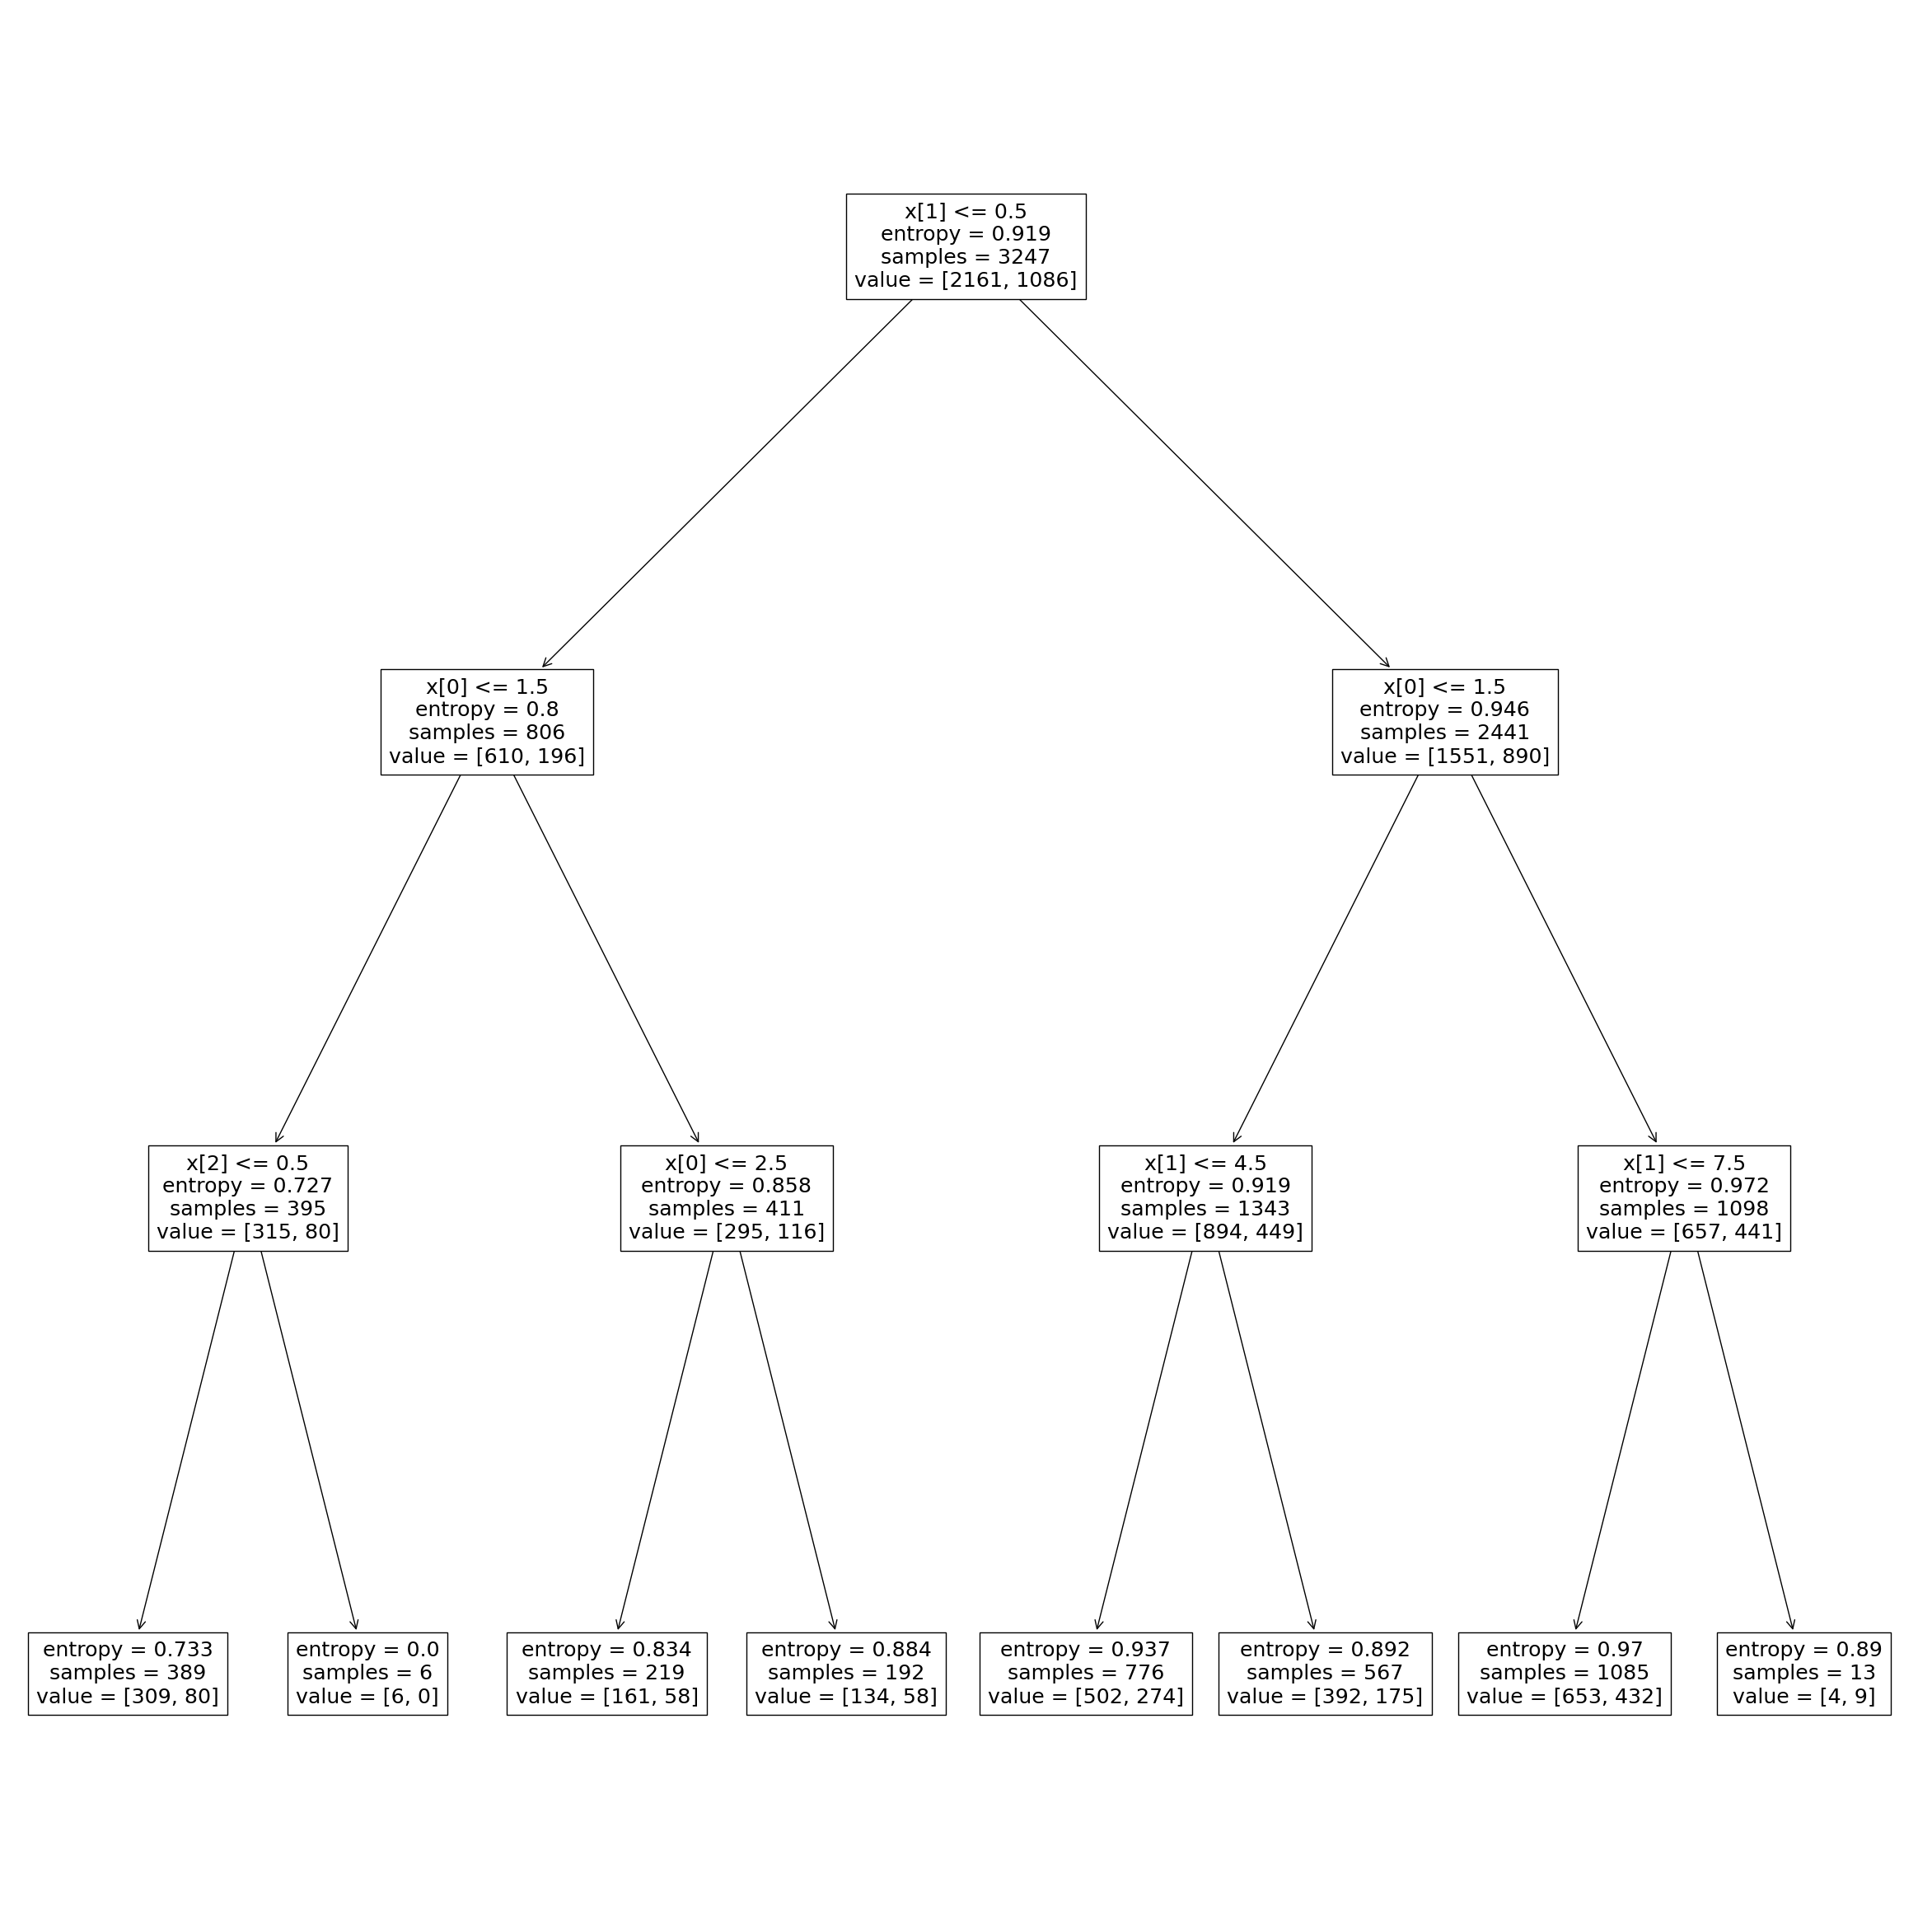

In [229]:
_,ax = plt.subplots(figsize=(30,30))
tree.plot_tree(Dtreeproject);

#### Test Accuracy

In [230]:
y_predict = Dtreeproject.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [231]:
y_test = pd.Series(y_test, name='Actual')
y_predict = pd.Series(y_predict, name='Predicted')
print(pd.crosstab(y_test, y_predict))

Predicted     0  1
Actual            
0          1117  0
1           500  2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
accuracy_score(y_test, y_predict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.68134872417983

In [217]:
print(f'f1_score : {f1_score(y_test.apply (int), y_predict.apply (int))}')
print(f'precision_score : {precision_score(y_test.apply (int), y_predict.apply (int))}')
print(f'recall_score : {recall_score(y_test.apply (int), y_predict.apply (int))}')

f1_score : 0.46566037735849053
precision_score : 0.38370646766169153
recall_score : 0.5921305182341651


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [218]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test.apply (int), y_predict.apply (int))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([0.7476247 , 0.38370647]),
 array([0.55955556, 0.59213052]),
 array([0.64006101, 0.46566038]),
 array([2250, 1042]))